### 선형 회귀
- 분류(yes or no)는 적용불가  

## 로지스틱 회귀
- 이진분류 
- 두 가지 범주로 나누어진 값을 예측하는데 사용
- 선형회귀 분석만큼 구현하고 해석하기 용이함
- 선형회귀 분석을 근간으로 하고 있기에 선형관계가 아닌 데이터에 대한 예측력이 떻어짐

### 타이타닉 생존자 예측 (로지스틱 회귀)


In [4]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Kaggle 
# https://www.kaggle.com/competitionstitanic
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/titanic_train.csv"
df_train = pd.read_csv(file_url)

In [6]:
df_train = pd.read_csv(file_url, index_col=0)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [9]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
# 상관관계
df_train.corr()
# 0.2 ....

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

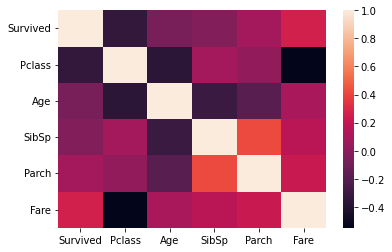

In [13]:
sns.heatmap(df_train.corr())

<AxesSubplot:>

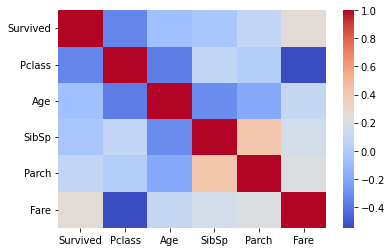

In [14]:
sns.heatmap(df_train.corr(), cmap='coolwarm')

<AxesSubplot:>

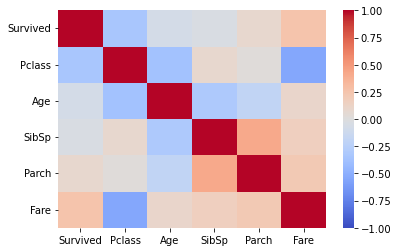

In [15]:
sns.heatmap(df_train.corr(), cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

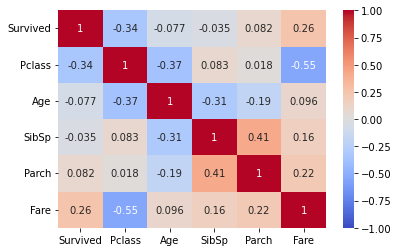

In [16]:
sns.heatmap(df_train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

결측치처리 

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# df_train.Embarked.fillna('S').unique()
# df_train.Embarked = df_train.Embarked.fillna('S')
df_train.Embarked.fillna('S', inplace=True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
df_train.drop(columns=['Cabin'], inplace=True)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S


In [23]:
df_train.drop(columns=['Ticket'], inplace=True)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.00,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.00,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S


In [24]:
# df_train['Title']
# df_train.Name.stype
df_train['Title'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,S,Mr
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.00,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.00,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,Miss


In [25]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [26]:
# set(df_train.Title)
title_unique = df_train.Title.unique()

In [27]:
rarelist = []
for t in title_unique:
  if list(df_train.Title).count(t) < 10:
    rarelist.append(t)
rarelist # 리슽 컴프리헨션 & 삼항연산자로 하는 법

['Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [28]:
df_train.Title = df_train.Title.replace(rarelist, 'Rare')

In [29]:
df_train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [30]:
# df_train.groupby(['Title'])['Age'].mean()
title_age_mean = df_train.groupby(['Title'])['Age'].mean()
title_age_mean

Title
Master    4.57
Miss     21.77
Mr       32.37
Mrs      35.90
Rare     42.38
Name: Age, dtype: float64

In [31]:
for t in df_train.Title.unique():
  # df_train.loc[df_train.Age.isnull() & (df_train.Title == 'Mr'), 'Age'] = title_age_mean['Mr']
   df_train.loc[df_train.Age.isnull() & (df_train.Title == t), 'Age'] = title_age_mean[t]

In [32]:
df_train.drop(columns=['Name', 'Title'], inplace=True)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [34]:
df_train2 = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

In [35]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


## 모델링

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X, y = (df_train2.drop(columns=['Survived']), df_train2.Survived)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [40]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 🏁 예측
* 모델을 활용해 예측

## 👀 예측 모델 평가
* 정확도 : 예측값과 실젯값을 비교하여 얼마나 맞추었는지 확인

## 🥕 이해
### 피처 엔지니어링 (Feature Engineering)
* 기존 데이터를 손보아 더 나은 변수를 만드는 기법
    * 예) 더미 변수
* 도메인 지식의 활용이 중요
    * 데이터에 사전 지식이 있으면 어떤 변수를 어떻게 바꾸면 더 나은 피처를 얻을 수 있을지 파악 가능
    * 도메인 지식을 바탕으로 정확한 목적을 가지고 수행하는 피처 엔지니어링이 더욱 효율적

#### 다중공선성(Multicolinearity) 문제
* 선형 회귀 분석, 로지스틱 회귀 분석 등 선형 모델에서 **독립변수 사이에 상관관계가 높은 때에 발생하는 문제**
* 특정 독립변수 간의 상관관계가 매우 높다면 종속변수의 변화 요인이 정확히 어떤 변수 때문인지 불투명해짐
* 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에, 다중공선성 문제를 해결해주는 것이 좋음
---
* **해결책**
    * 상관관계가 높은 변수 중 하나를 제거
    * 둘을 모두 포괄시키는 새로운 변수 생성
    * PCA 등의 방법으로 차원 축소를 수행
        * **PCA**(Principal Component Analysis, 주성분 분석)
---

In [41]:
pred = model.predict(X_test)

In [42]:
#@title 모델 평가 (로지스틱 회귀 -> 분류문제)
from sklearn.metrics import accuracy_score 

accuracy_score(y_test, pred)

0.7932960893854749

In [43]:
model.coef_

array([[-1.14190679, -0.04415713, -0.30628881, -0.23201175,  0.0028696 ,
        -2.584618  ,  0.03002193, -0.06110275]])

In [44]:
pd.options.display.float_format = '{:.4f}'.format
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.1419
Age          -0.0442
SibSp        -0.3063
Parch        -0.2320
Fare          0.0029
Sex_male     -2.5846
Embarked_Q    0.0300
Embarked_S   -0.0611
dtype: float64

In [45]:
def pre_processing(df : pd.DataFrame):
    df.Embarked = df.Embarked.fillna("S")
    df.Fare = df.Fare.fillna(0)
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    rarelist = [a for a in set(df['Title'])
                if list(df['Title']).count(a) < 10]
    df['Title'] = df['Title'].replace(rarelist, 'Rare')
    title_age_mean = df.groupby(['Title'])['Age'].mean()
    for v in df['Title'].unique():
        df.loc[df.Age.isnull() & (df.Title == v), 'Age'] = title_age_mean[v]
    df_clean = df.drop(columns=['Name', 'Ticket', 'Title', 'Cabin'])
    return pd.get_dummies(df_clean,
                          columns = ['Sex', 'Embarked'], drop_first=True)

In [46]:
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/"
submission = pd.read_csv(f'{file_url}/titanic_test.csv', index_col=0)

In [47]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [48]:
df_sub = pre_processing(submission)
df_sub

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5000,0,0,7.8292,1,1,0
893,3,47.0000,1,0,7.0000,0,0,1
894,2,62.0000,0,0,9.6875,1,1,0
895,3,27.0000,0,0,8.6625,1,0,1
896,3,22.0000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,32.0000,0,0,8.0500,1,0,1
1306,1,39.0000,0,0,108.9000,0,0,0
1307,3,38.5000,0,0,7.2500,1,0,1


In [49]:
pred_sub = model.predict(df_sub)
pred_sub

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [50]:
result = pd.DataFrame({'PassengerId':df_sub.index,'Survived':pred_sub})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
result.to_csv('submission.csv', index=False)